In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from collections import Counter

In [85]:
csv_path = "/home/ubuntu/hwpg-ae/analysis_ae/requests_results_1736775091_blocklists.csv"
df = pd.read_csv(csv_path)
df = df[df["source"] != "WARC"]

origins = df[['origin']].nunique()

display(df)
har_requests_len = len(df[(df["source"] == "HAR")])
print("HAR requests:", har_requests_len)
har_requests_len_filter = len(df[(df["source"] == "HAR") & (~df["additional_info"].isin(["har_redirects", "har_redirects_iframe", "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"]))])
print("HAR requests (after filter):", har_requests_len_filter)
pg_requests_len = len(df[df["source"] == "PG"])
print("PG requests:", pg_requests_len)
print(abs(har_requests_len_filter - pg_requests_len) / ((har_requests_len_filter + pg_requests_len) / 2) * 100)

print()

har_requests_set_len = len(set(df[(df["source"] == "HAR")]["url"]))
print("HAR requests (set):", har_requests_set_len)
har_requests_set_len_filter = len(set(df[(df["source"] == "HAR") & (~df["additional_info"].isin(["har_redirects", "har_redirects_iframe", "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"]))]["url"]))
print("HAR requests (set, after filter):", har_requests_set_len_filter)
pg_requests_set_len = len(set(df[df["source"] == "PG"]["url"]))
print("PG requests (set):", pg_requests_set_len)
print(abs(har_requests_set_len_filter - pg_requests_set_len) / ((har_requests_set_len_filter + pg_requests_set_len) / 2) * 100)

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party
0,http://localtest.me:8000/favicon.ico,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
1,http://localtest.me:8000/script.js,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
2,http://localtest.me:8000/x,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
3,http://www.googletagmanager.com/gtag/js?id=XXXXXX,PG,NaN,googletagmanager.com,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,True,True
4,https://localtest.me:8000/,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
5,http://localtest.me:8000/,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
6,http://localtest.me:8000/script.js,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
7,http://localtest.me:8000/x,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
8,https://www.googletagmanager.com/gtag/js?id=XX...,HAR,NaN,googletagmanager.com,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,True,True
9,http://localtest.me:8000/favicon.ico,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False


HAR requests: 5
HAR requests (after filter): 5
PG requests: 5
0.0

HAR requests (set): 5
HAR requests (set, after filter): 5
PG requests (set): 5
0.0


In [86]:
# How many requests are filtered

redirect_filter = len(df[(df["source"] == "HAR") & (df["additional_info"] == "har_redirects")]["url"])
print("redirect_filter", redirect_filter)
iframe_redirect_filter = len(df[(df["source"] == "HAR") & (df["additional_info"] == "har_redirects_iframe")]["url"])
print("iframe_redirect_filter", iframe_redirect_filter)
csp_filter = len(df[(df["source"] == "HAR") & (df["additional_info"] == "har_csp_report")]["url"])
print("csp_filter", csp_filter)
websocket_filter = len(df[(df["source"] == "HAR") & (df["additional_info"] == "har_websocket")]["url"])
print("websocket_filter", websocket_filter)
prefligth_filter = len(df[(df["source"] == "HAR") & (df["additional_info"] == "har_preflight")]["url"])
print("prefligth_filter", prefligth_filter)


redirect_filter 0
iframe_redirect_filter 0
csp_filter 0
websocket_filter 0
prefligth_filter 0


In [87]:
# How many third parties do we see at least on 2 first parties and what are the most prominent ones?
one_percentage = int(round(len(set(df['origin'])) * 0.01))
print(one_percentage)

df_third_parties = df[(df["third_party"] == True) & (df["source"] == "HAR")][["url_site", "site"]]
df_third_parties = df_third_parties.drop_duplicates()
display(df_third_parties.sort_values("url_site"))
df_third_parties = df_third_parties.groupby("url_site").count()
display(df_third_parties.sort_values("site").tail(10))
print("3rd parties at least 2 for HAR", len(df_third_parties[df_third_parties["site"] > 1]))
print(f"3rd parties on more than 1% {one_percentage} for HAR", len(df_third_parties[df_third_parties["site"] > one_percentage]))

df_third_parties = df[(df["third_party"] == True) & (df["source"] == "PG")][["url_site", "site"]]
df_third_parties = df_third_parties.drop_duplicates()
display(df_third_parties.sort_values("url_site"))
df_third_parties = df_third_parties.groupby("url_site").count()
display(df_third_parties.sort_values("site").tail(10))
print("3rd parties at least 2 for PG", len(df_third_parties[df_third_parties["site"] > 1]))
print(f"3rd parties on more than 1% {one_percentage} for PG", len(df_third_parties[df_third_parties["site"] > one_percentage]))

0


,url_site,site
8,googletagmanager.com,localtest.me


,site
url_site,
googletagmanager.com,1


3rd parties at least 2 for HAR 0
3rd parties on more than 1% 0 for HAR 1


,url_site,site
3,googletagmanager.com,localtest.me


,site
url_site,
googletagmanager.com,1


3rd parties at least 2 for PG 0
3rd parties on more than 1% 0 for PG 1


In [88]:
# Most prominent 3rd parties 
df_easyprivacy = df[(df["third_party"] == True) & (df["source"] == "HAR")][["url_site", "site", "source"]]
df_easyprivacy = df_easyprivacy[df_easyprivacy["source"] == "HAR"]
df_easyprivacy = df_easyprivacy[["url_site", "site"]]
df_easyprivacy = df_easyprivacy.drop_duplicates()
display(df_easyprivacy.groupby("url_site").count().sort_values("site").tail(10))


df_easyprivacy = df[(df["easyprivacy"] == True) | (df["easyprivacy"] == True)]
df_easyprivacy = df_easyprivacy[df_easyprivacy["source"] == "PG"]
df_easyprivacy = df_easyprivacy[["url_site", "site"]]
df_easyprivacy = df_easyprivacy.drop_duplicates()
display(df_easyprivacy.groupby("url_site").count().sort_values("site").tail(10))

,site
url_site,
googletagmanager.com,1


,site
url_site,
googletagmanager.com,1


In [89]:
# Orgigins: Different request numbers
df_origins = df[~df["additional_info"].isin(["har_redirects", "har_redirects_iframe", "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"])]
df_origins = df_origins.groupby(['origin', 'source'])
df_origins = df_origins.size().unstack(fill_value=0)
df_origins["diff"] = df_origins["HAR"] - df_origins["PG"]
df_origins = df_origins.sort_values(by=["diff"])
display(df_origins)
print("====================")
display(df_origins[df_origins["HAR"] != df_origins["PG"]])
print("====================")
display(df_origins[df_origins["HAR"] == df_origins["PG"]])

print(df_origins["diff"].mean())
print(df_origins[df_origins["HAR"] != df_origins["PG"]]["diff"].mean())

source,HAR,PG,diff
origin,,,
http_localtest.me:8000,5,5,0


source,HAR,PG,diff
origin,,,


source,HAR,PG,diff
origin,,,
http_localtest.me:8000,5,5,0


0.0
nan


In [90]:
# Orgigins: Different unique request urls
df_origins = df[~df["additional_info"].isin(["har_redirects", "har_redirects_iframe", "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"])]
df_origins = df_origins.groupby(['origin', 'source'])
df_origins = df_origins.agg({'url': lambda x: set(x)})
df_origins = df_origins.reset_index()

diffs = list()
diffs_https = list()
for orig in list(set(df_origins["origin"])):
    try:
        har_urls = set(df_origins[(df_origins["origin"]==orig) & (df_origins["source"]=="HAR")]["url"].values[0])
        har_urls_https = {u.replace("http://", "https://") for u in har_urls}
        pg_urls = set(df_origins[(df_origins["origin"]==orig) & (df_origins["source"]=="PG")]["url"].values[0])
        if len(har_urls) != len(pg_urls):
            diffs.append(orig)
        if len(har_urls_https) != len(pg_urls):
            diffs_https.append(orig)
    except Exception as e:
        print(orig, e)

    # df_origins[df_origins["HAR"]]["url"]
    # df_origins["PG"]["url"]
    # break
print(len(set(diffs)), len(set(df_origins["origin"])))
print(len(set(diffs_https)), len(set(df_origins["origin"])))

0 1
0 1


In [91]:
# Orgigins: Different unique request urls
df_origins = df[~df["additional_info"].isin(["har_redirects", "har_redirects_iframe", "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"])]
df_origins = df_origins.groupby(['origin', 'source'])
df_origins = df_origins.agg({'url': lambda x: set(x)})
df_origins = df_origins.reset_index()

for orig in diffs_https[:20]:
    try:
        har_urls = set(df_origins[(df_origins["origin"]==orig) & (df_origins["source"]=="HAR")]["url"].values[0])
        har_urls_https = {u.replace("http://", "https://") for u in har_urls}
        pg_urls = set(df_origins[(df_origins["origin"]==orig) & (df_origins["source"]=="PG")]["url"].values[0])

        print(orig)
        print("Har more:", har_urls_https - pg_urls)
        print("PG more:", pg_urls - har_urls_https)
        print("====")
        
    except Exception as e:
        print(orig, e)


In [92]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[(df["origin"] == "https_www.privateproperty.co.za") & (df["url"].str.startswith("https://bat.bing.com")) & (df["source"] == "PG")])
    display(df[(df["origin"] == "https_www.privateproperty.co.za") & (df["url"].str.startswith("https://bat.bing.com")) & (df["source"] == "HAR")])

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


In [93]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[(df["origin"] == "https_www.privateproperty.co.za") & (df["url"].str.startswith("https://bat.bing.com")) & (df["source"] == "PG")])
    display(df[(df["origin"] == "https_www.privateproperty.co.za") & (df["url"].str.startswith("https://bat.bing.com")) & (df["source"] == "HAR")])

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


In [94]:
diffs_https[:20]

[]

# Third Party

In [95]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    l = list({'143.110.211.235.', 'josex.mobi', 'tamilprint24.art', 'trustedbanana.com', 'truyenhdx.com', 'cdnntx.com', 'pornohype.me', 'colorlib.com', 'shb-sync.com', 'vidiocdn.net', 'scribbr.com', 'linkjj.com', 'dffgames.com', 'earthweb.com', 'idos.cz', 'adflyer.media', 'tamilprint24.store', 'baskino.me', 'oxtubex1.name', 'efbet.com', 'radioonlinehd.net', 'sponser.co.il', 'tamilprint24.shop', '__bridge_loaded__.', 'oxtube.cc', 'ibus.cl', 'direktur0209.com', 'pagibigfund.gov.ph', 'adxfactory.com', 'winbet.bg', 'tumanhwas.com', 'megahdporno.name', 'aniwind.pro', 'ibytedtos.com', 'uwaterloo.ca'})
    display(df[(df["source"] == "HAR") & (df["url_site"].isin(l))])
    display(df[(df["source"] == "HAR") & (df["url_site"].isin(l))]["url_site"].value_counts())

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


Series([], Name: count, dtype: int64)

In [96]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    l = list({'da29e6b8-f018-490f-b25f-39a887fc95e7.xyz', 'rhplayer.com', 'volccdn.com', 'terriblecomposureunkind.com', 'shohoz.com', 'xn--s3cx7a.com', 'iqm.com', 'marker.io', 'ck123.io', 'xn--ph1bph0az41x.org', 'xn--12cl7cj4aa9dd5cp5ona1eya.com', 'altema-log.com', 'territorium.com', 'xn--h10b90b998c.site', 'pygear.com', 'godopu.xyz', 'burdadigital.pl', 'kingmakers.tech', 'xn--168-1klyfn3i1b2j7c.com', 'datalaser247.com'})
    display(df[(df["source"] == "PG") & (df["url_site"].isin(l))])
    display(df[(df["source"] == "PG") & (df["url_site"].isin(l))]["url_site"].value_counts())

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


Series([], Name: count, dtype: int64)

In [97]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[df["origin"] == "https_www.mackolik.com"])

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party


In [98]:
# How many third parties do we see?
df_third_party = df[(df["third_party"] == True) & (~df["additional_info"].isin(["har_redirects", "har_redirects_iframe", "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"]))] # , "har_prefetch", "har_csp_report", "har_websocket", "har_preflight"
df_third_party = df_third_party[~df_third_party["url_site"].isin({'http.', '{domain}.', 'localhost.', 'it(none).'})]

one_percentage = int(df[['origin']].nunique()[0] * 0.01)
print("HAR 3rd: ", len(set(df_third_party[df_third_party["source"] == "HAR"]["url_site"])))
df_har_third_party_count = df_third_party[df_third_party["source"] == "HAR"]["url_site"].value_counts()
print("HAR 3rd >= 2 sites: ", len(df_har_third_party_count[df_har_third_party_count > 1]))
print(f"HAR 3rd >= 1% {one_percentage} sites: ", len(df_har_third_party_count[df_har_third_party_count > one_percentage]))

print("PG 3rd: ", len(set(df_third_party[df_third_party["source"] == "PG"]["url_site"])))
df_pg_third_party_count = df_third_party[df_third_party["source"] == "PG"]["url_site"].value_counts()
print("PG 3rd >= 2 sites: ", len(df_pg_third_party_count[df_pg_third_party_count > 1]))
print(f"PG 3rd >= 1% {one_percentage} sites: ", len(df_pg_third_party_count[df_pg_third_party_count > one_percentage]))

print()
print("Missing 3rd parties")
print(set(df_third_party[df_third_party["source"] == "HAR"]["url_site"]) - set(df_third_party[df_third_party["source"] == "PG"]["url_site"]))
print(set(df_third_party[df_third_party["source"] == "PG"]["url_site"]) - set(df_third_party[df_third_party["source"] == "HAR"]["url_site"]))
print()

# How many sites have at least one third party?
df_third_party = df_third_party.groupby(['origin', 'source'])
df_third_party = df_third_party.size().unstack(fill_value=0)

display(df_third_party)

if 'PG' in df_third_party:
    display(df_third_party[df_third_party["PG"] == 0])
if 'HAR' in df_third_party:
    display(df_third_party[df_third_party["HAR"] == 0])

if 'HAR' in df_third_party:
    print(df_third_party[df_third_party["HAR"] > 0].count())
if 'PG' in df_third_party:
    print(df_third_party[df_third_party["PG"] > 0].count())

HAR 3rd:  1
HAR 3rd >= 2 sites:  0
HAR 3rd >= 1% 0 sites:  1
PG 3rd:  1
PG 3rd >= 2 sites:  0
PG 3rd >= 1% 0 sites:  1

Missing 3rd parties
set()
set()



/tmp/ipykernel_4123668/2611986078.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  one_percentage = int(df[['origin']].nunique()[0] * 0.01)


source,HAR,PG
origin,,
http_localtest.me:8000,1,1


source,HAR,PG
origin,,


source,HAR,PG
origin,,


source
HAR    1
PG     1
dtype: int64
source
HAR    1
PG     1
dtype: int64


===== PG =====
===== HAR =====


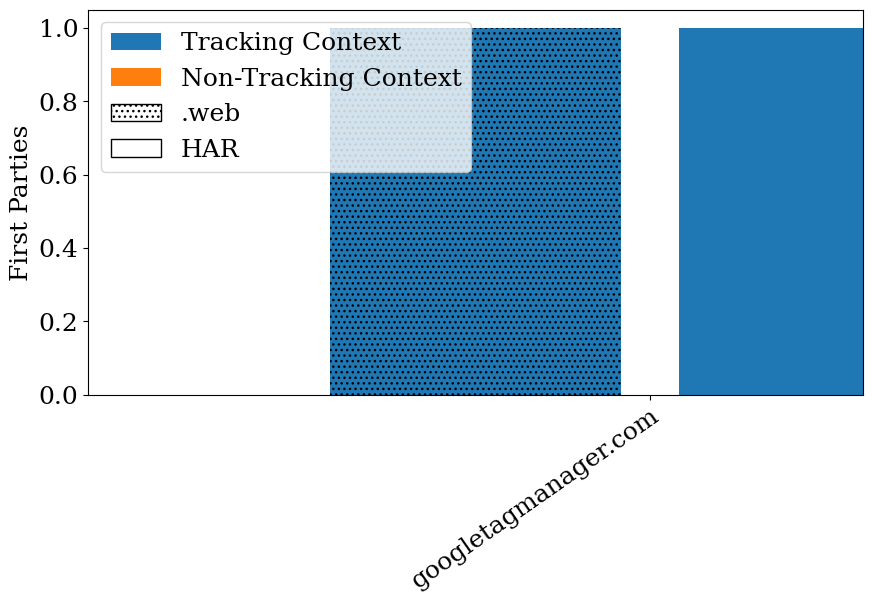

In [99]:
# Which are the top third parties
def print_third_party_and_trackers(source, ax=None):
    df_third_party = df[(df["third_party"] == True) & (~df["additional_info"].isin(["har_redirects"]))]
    df_trackers = df[(df["easyprivacy"] == True) | (df["easylist"] == True)]
    
    df_third_party = df_third_party[df_third_party["source"] == source]
    df_third_party = df_third_party[["url_site", "origin"]]
    df_third_party = df_third_party.drop_duplicates()
    df_third_party = df_third_party.groupby("url_site").count().reset_index()
    
    df_trackers = df_trackers[df_trackers["source"] == source]
    df_trackers = df_trackers[["url_site", "origin"]]
    df_trackers = df_trackers.drop_duplicates()
    df_trackers = df_trackers.groupby("url_site").count().reset_index()
    
    
    top_third_and_track = df_third_party.merge(df_trackers, on="url_site", how="left", suffixes=('_third_party', '_tracker'))
    top_third_and_track["origin_tracker"] = top_third_and_track["origin_tracker"].fillna(0)

    print("=====",source,"=====")
    top_10 = top_third_and_track.sort_values("origin_third_party", ascending=False).head(20)
    top_10 = top_10.set_index('url_site')
    top_10["Tracking Context"] = top_10["origin_tracker"]
    top_10["Non-Tracking Context"] = top_10["origin_third_party"] - top_10["origin_tracker"]
    # display(top_10)

    if ax == None:
        ax = top_10[["Tracking Context","Non-Tracking Context"]].plot.bar(stacked=True, figsize=(10,5), position=-0.1, width=0.3)
    else:
        top_10[["Tracking Context","Non-Tracking Context"]].plot.bar(stacked=True, figsize=(10,5), ax=ax, position=1.1, width=0.3, hatch=['...'])
    return ax
    
# latexify()
plt.rcParams.update({'font.size': 18, 'font.family': 'serif', 'grid.linestyle': 'solid', 'legend.fancybox': True})
ax = print_third_party_and_trackers("PG")
ax = print_third_party_and_trackers("HAR", ax=ax)

width = 0.25
x = np.arange(len(ax.get_xticklabels()))
# ax.set_xticks(x + width, ax.get_xticklabels())
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right', rotation_mode='anchor')
ax.set_ylabel("First Parties")
ax.set_xlabel("")

# old_legend = ax.get_legend()
h, l = ax.get_legend_handles_labels()

har_label = mpatches.Patch(facecolor='white', edgecolor='black', hatch='',label='HAR')
pg_label = mpatches.Patch(facecolor='white', edgecolor='black', hatch='...',label='.web')
ax.legend(handles = h[:2] + [pg_label, har_label])
plt.savefig("top_third_party.pdf", format="pdf", bbox_inches="tight")



# Trackers

In [101]:
df_easylist = df[df["easylist"] == True]
df_easylist = df_easylist.groupby(['origin', 'source'])
df_easylist = df_easylist.size().unstack(fill_value=0)
display(df_easylist)
if "PG" in df_easylist:
    display(df_easylist[df_easylist["PG"] == 0])

if "HAR" in df_easylist:
    display(df_easylist[df_easylist["HAR"] == 0])

if "HAR" in df_easylist:
    print(df_easylist[df_easylist["HAR"] > 0].count())
if "PG" in df_easylist:
    print(df_easylist[df_easylist["PG"] > 0].count())

source
origin


In [102]:
df_easyprivacy = df[df["easyprivacy"] == True]
df_easyprivacy = df_easyprivacy.groupby(['origin', 'source'])
df_easyprivacy = df_easyprivacy.size().unstack(fill_value=0)
display(df_easyprivacy)
if "PG" in df_easyprivacy:
    display(df_easyprivacy[df_easyprivacy["PG"] == 0])

if "HAR" in df_easyprivacy:
    display(df_easyprivacy[df_easyprivacy["HAR"] == 0])

if "HAR" in df_easyprivacy:
    print(df_easyprivacy[df_easyprivacy["HAR"] > 0].count())
if "PG" in df_easyprivacy:
    print(df_easyprivacy[df_easyprivacy["PG"] > 0].count())

source,HAR,PG
origin,,
http_localtest.me:8000,1,1


source,HAR,PG
origin,,


source,HAR,PG
origin,,


source
HAR    1
PG     1
dtype: int64
source
HAR    1
PG     1
dtype: int64


In [103]:
# How many trackers do we see?
df_easyprivacy = df[(df["easyprivacy"] == True) | (df["easyprivacy"] == True)]

print("HAR trackers: ", len(set(df_easyprivacy[df_easyprivacy["source"] == "HAR"]["url_site"])))
print("PG trackers: ", len(set(df_easyprivacy[df_easyprivacy["source"] == "PG"]["url_site"])))

print(set(df_easyprivacy[df_easyprivacy["source"] == "HAR"]["url_site"]) - set(df_easyprivacy[df_easyprivacy["source"] == "PG"]["url_site"]))


df_easyprivacy = df_easyprivacy.groupby(['origin', 'source'])
df_easyprivacy = df_easyprivacy.size().unstack(fill_value=0)
display(df_easyprivacy)
display(df_easyprivacy[df_easyprivacy["PG"] == 0])
display(df_easyprivacy[df_easyprivacy["HAR"] == 0])

print(df_easyprivacy[df_easyprivacy["HAR"] > 0].count())
print(df_easyprivacy[df_easyprivacy["PG"] > 0].count())

HAR trackers:  1
PG trackers:  1
set()


source,HAR,PG
origin,,
http_localtest.me:8000,1,1


source,HAR,PG
origin,,


source,HAR,PG
origin,,


source
HAR    1
PG     1
dtype: int64
source
HAR    1
PG     1
dtype: int64


In [104]:
# Most prominent trackers
df_easyprivacy = df[(df["easyprivacy"] == True) | (df["easyprivacy"] == True)]
df_easyprivacy = df_easyprivacy[df_easyprivacy["source"] == "HAR"]
df_easyprivacy = df_easyprivacy[["url_site", "site"]]
df_easyprivacy = df_easyprivacy.drop_duplicates()
display(df_easyprivacy.groupby("url_site").count().sort_values("site").tail(10))


df_easyprivacy = df[(df["easyprivacy"] == True) | (df["easyprivacy"] == True)]
df_easyprivacy = df_easyprivacy[df_easyprivacy["source"] == "PG"]
df_easyprivacy = df_easyprivacy[["url_site", "site"]]
df_easyprivacy = df_easyprivacy.drop_duplicates()
display(df_easyprivacy.groupby("url_site").count().sort_values("site").tail(10))

,site
url_site,
googletagmanager.com,1


,site
url_site,
googletagmanager.com,1


In [105]:
# df["site"] = [tldextract.extract(u).domain + "." + tldextract.extract(u).suffix for u in df["url"]]
display(df)

,url,source,additional_info,url_site,origin,pg_origin,site,easylist,easyprivacy,third_party
0,http://localtest.me:8000/favicon.ico,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
1,http://localtest.me:8000/script.js,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
2,http://localtest.me:8000/x,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
3,http://www.googletagmanager.com/gtag/js?id=XXXXXX,PG,NaN,googletagmanager.com,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,True,True
4,https://localtest.me:8000/,PG,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
5,http://localtest.me:8000/,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
6,http://localtest.me:8000/script.js,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
7,http://localtest.me:8000/x,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False
8,https://www.googletagmanager.com/gtag/js?id=XX...,HAR,NaN,googletagmanager.com,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,True,True
9,http://localtest.me:8000/favicon.ico,HAR,NaN,localtest.me,http_localtest.me:8000,http://localtest.me:8000,localtest.me,False,False,False


In [106]:
import tldextract
easylist_urls = list(df[df["easylist"] == True]["url"])
easylist_sites = [tldextract.extract(u).domain + "." + tldextract.extract(u).suffix for u in easylist_urls]
print(len(set(easylist_sites)))
easylist_cnt = Counter(easylist_sites)
easylist_cnt.most_common(15) 

0


[]

In [107]:
df_easylist_trackers = df[df["easylist"] == True]
df_easylist_trackers = df_easylist_trackers.groupby(['source'])

display(df_easylist_trackers['site'].nunique())
print("====")
display(df_easylist_trackers['site'].value_counts().nlargest(20))

Series([], Name: site, dtype: int64)

====


Series([], Name: count, dtype: int64)